In [2]:
using QuantumOptics
using PyPlot

The complete Hamiltonian is 
$$\hat{H} = \frac{1}{2}\hbar \omega_0\sigma_3 + \hbar \omega a^\dagger a + \hbar\lambda(\sigma_+ + \sigma_-)(a+a^\dagger)
$$

Using the RWA, ie. dropping out the values which rotate faster in case of resonance $\omega = \omega_0$, we get

$$ \hat{H}_{JC} = \frac{1}{2}\hbar \omega_0\sigma_3 + \hbar \omega a^\dagger a + \hbar\lambda(\sigma_+a + \sigma_-a^\dagger) $$


$$ \sigma_+ = |e\rangle \langle g|$$  

$$ \sigma_- = |g\rangle \langle e|$$

$$ \sigma_3 = |e\rangle \langle e| - |g\rangle \langle g|$$

$$ [\sigma_+,\sigma_-] = \sigma_3$$


In [3]:
ω_C = 2*π       #Cavity Frecuency
ω_A = 2*π       #Atom Frecuency
g = 2*π*0.05    #Coupling Strength
#g = 1
κ = 0.005        #Cavity Dissipation Rate
γ = 0.05        #Atom Dissipation Rate
N = 15          #Number of Cavity Fock States



########################


# Bases
# Definimos las bases en las que trabajaremos. Al final tomamos el producto tensorial para general la base general. 

b_fock = FockBasis(N)
b_spin = SpinBasis(1//2)
b = b_fock ⊗ b_spin


########################

# Fundamental operators

a = destroy(b_fock)   #La función destroy : Annihilation operator for the given Fock space 
at = create(b_fock)   #La función create: Creation operator for the given Fock space.
n = number(b_fock)    # number : Number operator for the given Fock space 



sm = sigmam(b_spin)   
sp = sigmap(b_spin)   
sz = sigmaz(b_spin)

Hatom = ω_A*sz/2  # Sección del Hamiltoniano relacionado con el átomo 
Hfield = ω_C*at*a #Probaremos si cambiando n = at*a cambia el asunto.     
Hint = g*(at⊗sm + a⊗sp)

Hint_2 = g*(at⊗sm + a⊗sp + at⊗sp + a⊗sm)

H = identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint

#El siguiente Hamiltoniano no toma encuentra RWA

H_2 = identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint_2;

#Tiempo
T = Array(linspace(0,100,1000));

In [4]:
#Caso No Normalizado
ψ_inicial_1 =(coherentstate(b_fock, 1) ⊗ (spinup(b_spin) + spindown(b_spin)))

#Caso Normalizado
ψ_inicial_2 =normalize!(coherentstate(b_fock, 1) ⊗ (spinup(b_spin) + spindown(b_spin)))

tout, ψ_tiempo_1 = timeevolution.schroedinger(T, ψ_inicial_1, H)

tout, ψ_tiempo_2 = timeevolution.schroedinger(T, ψ_inicial_2, H);

expec_sz_1 = expect(identityoperator(b_fock) ⊗ sz, ψ_tiempo_1)

expec_sz_2 = expect(identityoperator(b_fock) ⊗ sz, ψ_tiempo_2);

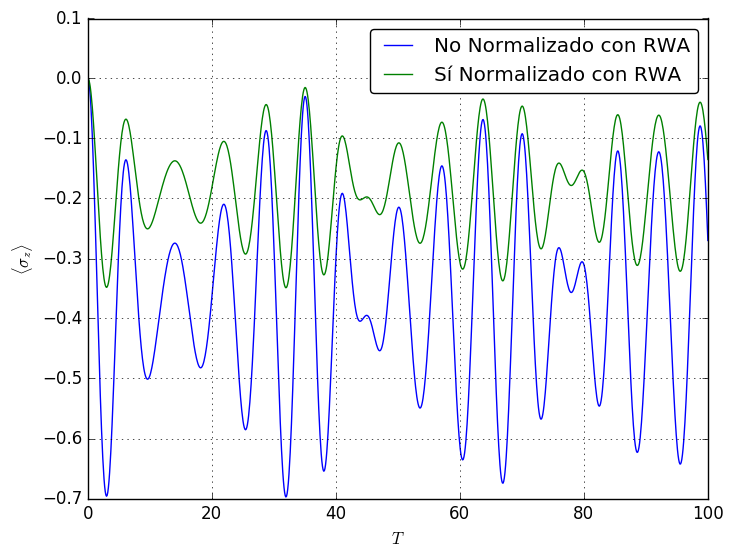

PyObject <matplotlib.text.Text object at 0x7fd46032c358>

In [5]:
plot(T, expec_sz_1, label = "No Normalizado con RWA")
plot(T, expec_sz_2, label = "Sí Normalizado con RWA")

legend(loc="upper right",fancybox="true")
grid("on")

xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle")

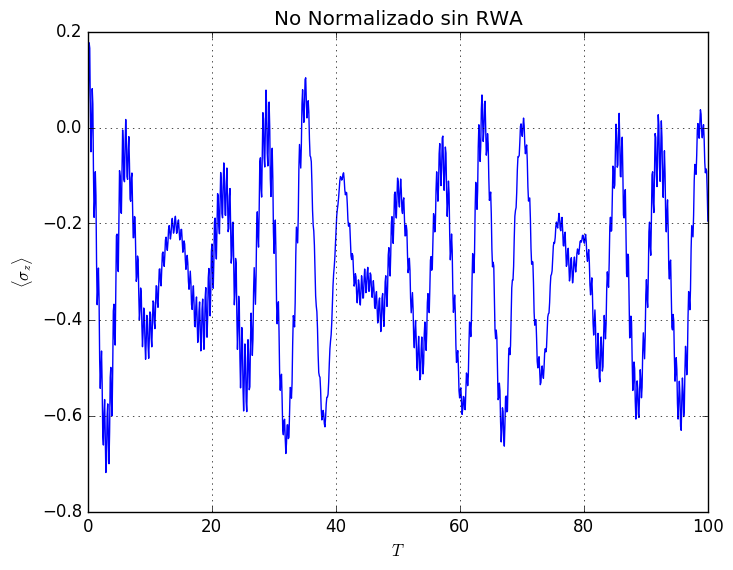

  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/nicolas/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /home/nicolas/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/nicolas/.julia/v0.5/PyCall/sr

PyObject <matplotlib.text.Text object at 0x7fd4605c3b38>

In [6]:
ψ_inicial_3 =(coherentstate(b_fock, 1) ⊗ (spinup(b_spin) + spindown(b_spin)))
tout, ψ_tiempo_3 = timeevolution.schroedinger(T, ψ_inicial_3, H_2)
expec_sz_3 = expect(identityoperator(b_fock) ⊗ sz, ψ_tiempo_3)

plot(T,expec_sz_3)
title("No Normalizado sin RWA")
grid("on")

xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle")

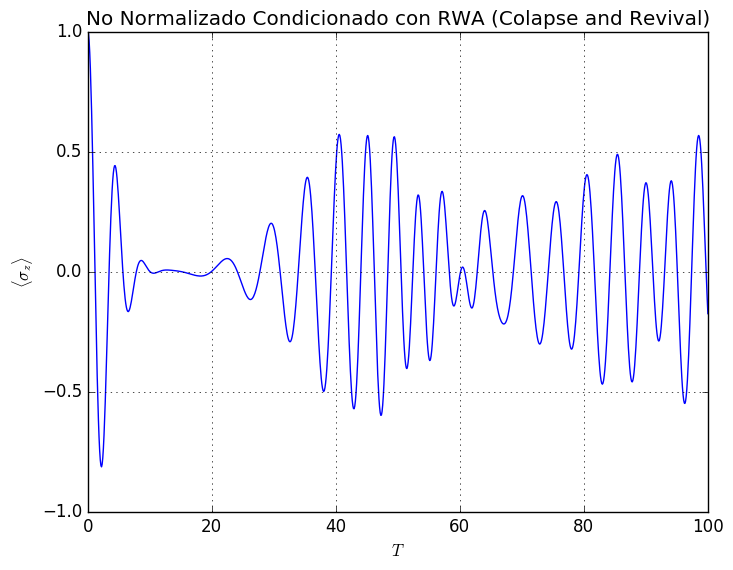

PyObject <matplotlib.text.Text object at 0x7fd45dd42630>

In [7]:

ψ_inicial_4 =(coherentstate(b_fock, 2) ⊗ (spinup(b_spin)))
tout, ψ_tiempo_4 = timeevolution.schroedinger(T, ψ_inicial_4, H)
expec_sz_4 = expect(identityoperator(b_fock) ⊗ sz, ψ_tiempo_4)

plot(T,expec_sz_4)
title("No Normalizado Condicionado con RWA (Colapse and Revival)")
grid("on")

xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle")

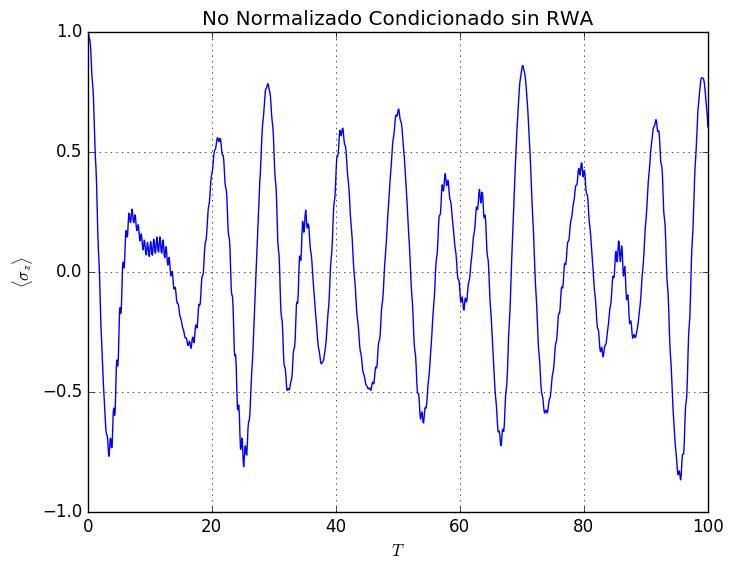

PyObject <matplotlib.text.Text object at 0x7fd45dce6c88>

In [8]:
ψ_inicial_5 =(coherentstate(b_fock, 1) ⊗ (spinup(b_spin)))
tout, ψ_tiempo_5 = timeevolution.schroedinger(T, ψ_inicial_5, H_2)
expec_sz_5 = expect(identityoperator(b_fock) ⊗ sz, ψ_tiempo_5)

plot(T,expec_sz_5)
title("No Normalizado Condicionado sin RWA")
grid("on")

xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle")

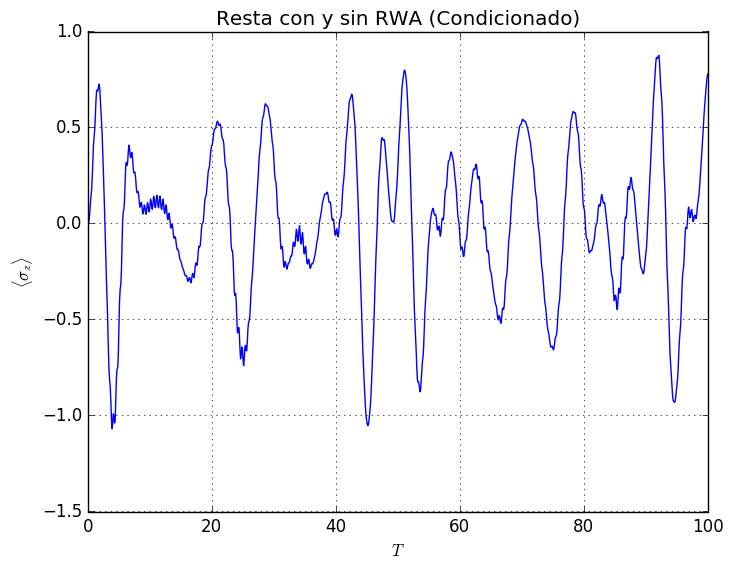

PyObject <matplotlib.text.Text object at 0x7fd45dd3ceb8>

In [9]:
#Haremos ahora una comparación de con y sin RWA tomando condiciones iniciales y sin normalizar

expec_sz_6 = zeros(Complex{Float64},1)

for j in 2:length(T)
    
    push!(expec_sz_6, expec_sz_5[j]-expec_sz_4[j])
end

expec_sz_6

plot(T, expec_sz_6)
#  plot(T, abs(expec_sz_6)) #Esta toma el valor absoluto de la diferencia. 

title("Resta con y sin RWA (Condicionado)")
grid("on")

xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle")

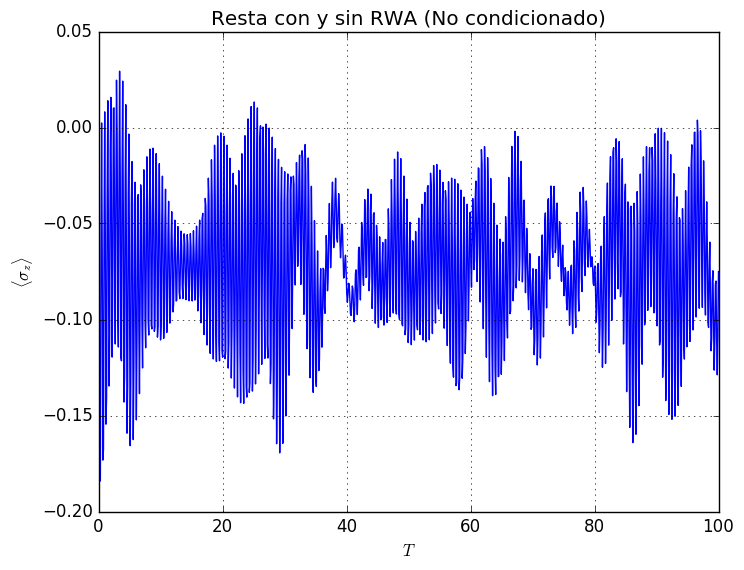

PyObject <matplotlib.text.Text object at 0x7fd45dc07898>

In [10]:
#Haremos ahora una comparación de con y sin RWA tomando condiciones iniciales y sin normalizar

expec_sz_7 = zeros(Complex{Float64},1)

for j in 2:length(T)
    
    push!(expec_sz_7, expec_sz_1[j]-expec_sz_3[j])
end

expec_sz_7

plot(T, expec_sz_7)
title("Resta con y sin RWA (No condicionado)")
grid("on")

xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle")

Lossy Jaynes-Cummings model
---------------------------

The Jaynes-Cummings model can be expanded by giving the 2 level atom a finite spontenous decay rate $\gamma$. The system is then an open quantum system which is described by a master equation of the form

$$
    \dot{\rho} = -\frac{i}{\hbar} \big[H,\rho\big]
                 + \sum_i \big(
                        J_i \rho J_i^\dagger
                        - \frac{1}{2} J_i^\dagger J_i \rho
                        - \frac{1}{2} \rho J_i^\dagger J_i
                    \big)
$$

where in this case there is only one jump operator $J_{2}=\sqrt{\gamma} \sigma_-$.

In [11]:
J = [sqrt(γ)*identityoperator(b_fock) ⊗ sm];

In [12]:
psi0 =(coherentstate(b_fock, 1) ⊗ (spinup(b_spin)))

QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[0.606531+0.0im,0.0+0.0im,0.606531+0.0im,0.0+0.0im,0.428882+0.0im,0.0+0.0im,0.247615+0.0im,0.0+0.0im,0.123808+0.0im,0.0+0.0im  …  9.60008e-5+0.0im,0.0+0.0im,2.7713e-5+0.0im,0.0+0.0im,7.68622e-6+0.0im,0.0+0.0im,2.05423e-6+0.0im,0.0+0.0im,5.30399e-7+0.0im,0.0+0.0im])

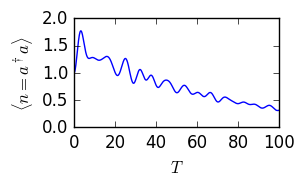

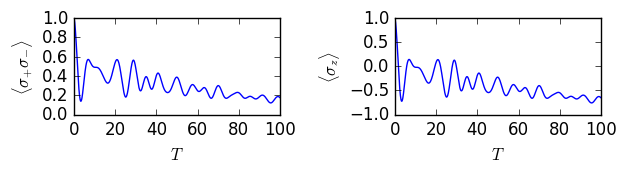

In [13]:
# Master

sx = sp*sm

tout, ρt = timeevolution.master(T, psi0, H, J)
exp_n_master = expect(at*a ⊗ identityoperator(b_spin), ρt) 
exp_sz_master = expect(identityoperator(b_fock) ⊗ sz, ρt)
exp_sx_master = expect(identityoperator(b_fock) ⊗ sx, ρt)


figure(figsize=(9,3))
subplot(2,3,1)
ylim([0, 2])
plot(T, exp_n_master);
xlabel(L"T")
ylabel(L"\langle n = a^\dagger a \rangle")

figure(figsize=(9,3))
subplot(2,3,2)
ylim([0, 1])
plot(T, exp_sx_master);
xlabel(L"T")
ylabel(L"\langle \sigma_{+}\sigma_{-} \rangle")

subplot(2,3,3)
ylim([-1, 1])
plot(T, exp_sz_master);
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle");

tight_layout();

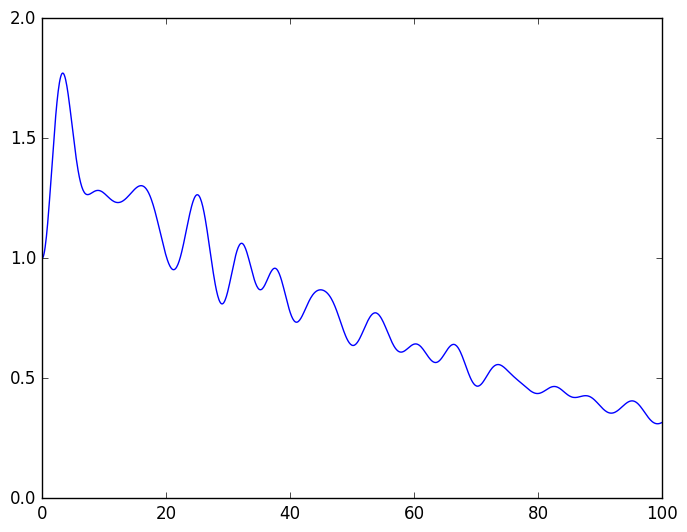

(0,2)

In [14]:
exp_cavity_master = expect(at*a ⊗ identityoperator(b_spin), ρt)
plot(T,exp_cavity_master)
ylim(0,2)

### With Dissipation con $J_1$ y $J_2$
$$
\dot{\rho} = -\frac{i}{\hbar}[H_{JC},\rho]+ \mu\bigg[a\rho a^\dagger-\frac{1}{2}(a^\dagger a \rho + \rho a^\dagger a )\bigg]+ 
\nu\bigg[a^\dagger \rho a - \frac{1}{2}(aa^\dagger \rho + \rho aa^\dagger)\bigg]
$$

Tomamos entonces $J_1 = \sqrt{\gamma} a^\dagger $ y $J_2 = \sqrt{\kappa} a$

In [15]:
#J_1 = [sqrt(γ)*at ⊗ identityoperator(b_spin)]
#J_2 = [sqrt(κ)*a ⊗ identityoperator(b_spin)];

J_1 = [sqrt(γ)*identityoperator(b_fock) ⊗ sm]
J_2 = [sqrt(κ)*identityoperator(b_fock) ⊗ sp];

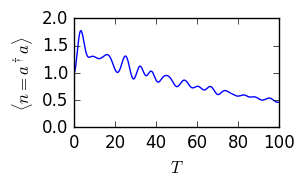

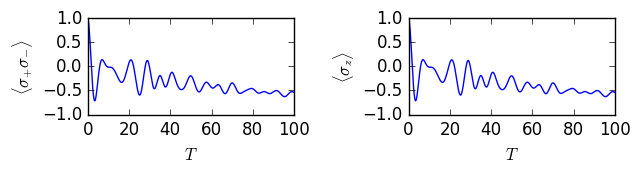

In [16]:
tout, ρtotal = timeevolution.master(T, psi0, H, J_1+J_2)

exp_n_master_2 = expect(at*a ⊗ identityoperator(b_spin), ρtotal) 
exp_sz_master_2 = expect(identityoperator(b_fock) ⊗ sz, ρtotal)
exp_sx_master_2 = expect(identityoperator(b_fock) ⊗ sz, ρtotal)

figure(figsize=(9,3))
subplot(2,3,1)
ylim([0, 2])
plot(T, exp_n_master_2);
xlabel(L"T")
ylabel(L"\langle n = a^\dagger a \rangle")

figure(figsize=(9,3))
subplot(2,3,2)
ylim([-1, 1])
plot(T, exp_sx_master_2);
xlabel(L"T")
ylabel(L"\langle \sigma_{+}\sigma_{-} \rangle")

subplot(2,3,3)
ylim([-1, 1])
plot(T, exp_sz_master_2);
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle");

tight_layout();

#### Dissipation con sólo $J_1$

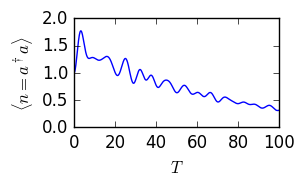

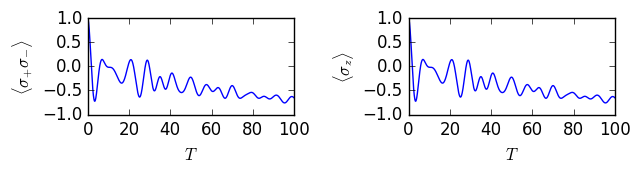

In [17]:
tout, ρtotal_2 = timeevolution.master(T, psi0, H, J_1)

exp_n_master_3 = expect(at*a ⊗ identityoperator(b_spin), ρtotal_2) 
exp_sz_master_3 = expect(identityoperator(b_fock) ⊗ sz, ρtotal_2)
exp_sx_master_3 = expect(identityoperator(b_fock) ⊗ sz, ρtotal_2)

figure(figsize=(9,3))
subplot(2,3,1)
ylim([0, 2])
plot(T, exp_n_master_3);
xlabel(L"T")
ylabel(L"\langle n = a^\dagger a \rangle")

figure(figsize=(9,3))
subplot(2,3,2)
ylim([-1, 1])
plot(T, exp_sx_master_3);
xlabel(L"T")
ylabel(L"\langle \sigma_{+}\sigma_{-} \rangle")

subplot(2,3,3)
ylim([-1, 1])
plot(T, exp_sz_master_3);
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle");

tight_layout();

### Sin Dissipation

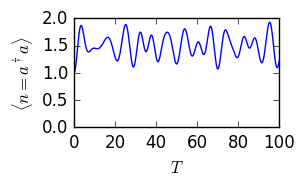

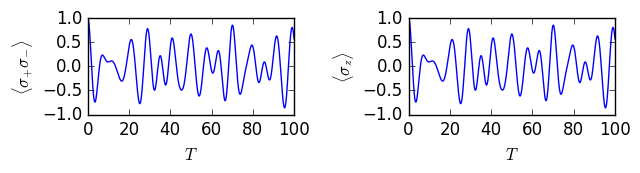

In [18]:
tout, ρtotal_3 = timeevolution.schroedinger(T, psi0, H)
#exp_n_master_4 = expect(n ⊗ identityoperator(b_spin), ρtotal_3) 
exp_n_master_4 = expect(at*a ⊗ identityoperator(b_spin), ρtotal_3) 
exp_sz_master_4 = expect(identityoperator(b_fock) ⊗ sz, ρtotal_3)
exp_sx_master_4 = expect(identityoperator(b_fock) ⊗ sz, ρtotal_3)

figure(figsize=(9,3))
subplot(2,3,1)
ylim([0, 2])
plot(T, exp_n_master_4);
xlabel(L"T")
ylabel(L"\langle n = a^\dagger a \rangle")

figure(figsize=(9,3))
subplot(2,3,2)
ylim([-1, 1])
plot(T, exp_sx_master_4);
xlabel(L"T")
ylabel(L"\langle \sigma_{+}\sigma_{-} \rangle")

subplot(2,3,3)
ylim([-1, 1])
plot(T, exp_sz_master_4);
xlabel(L"T")
ylabel(L"\langle \sigma_z \rangle");

tight_layout();

#### Ahora veremos cómo cambia lo anterior variando el coupling strength

In [19]:
g_vec = linspace(0, 1, 1000) # coupling strength vector


1000-element LinSpace{Float64}:
 0.0,0.001001,0.002002,0.003003,0.004004,…,0.996997,0.997998,0.998999,1.0

In [20]:
Hatom = ω_A*sz/2  # Sección del Hamiltoniano relacionado con el átomo 
Hfield = ω_C*at*a #Probaremos si cambiando n = at*a cambia el asunto.
Hint_2 = [Hint for g in g_vec]
H_coupling = [H for Hint in Hint_2]

ρ = []

for i in 1:length(H_coupling)
    push!(ρ, tout, timeevolution.schroedinger(T, psi0, H_coupling[i]))
end
return ρ;

LoadError: LoadError: unsupported or misplaced expression return
while loading In[20], in expression starting on line 11

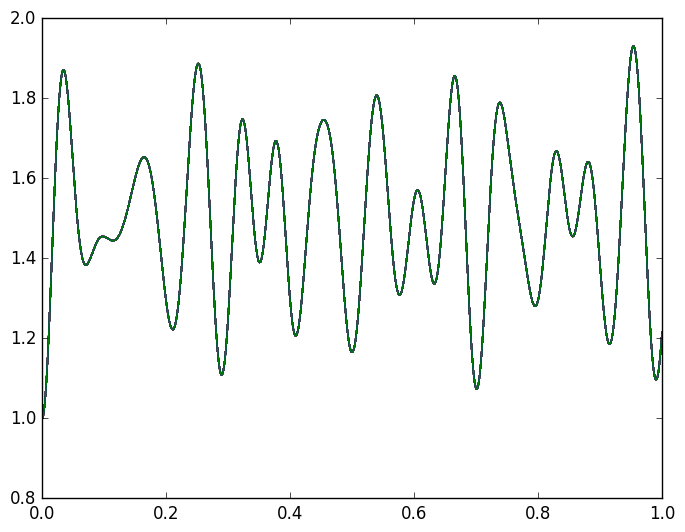

In [21]:

for i in 1:100
tout, hola = timeevolution.schroedinger(T, psi0, H_coupling[1])
    plot(g_vec,  expect(at*a ⊗ identityoperator(b_spin), hola))
end

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64


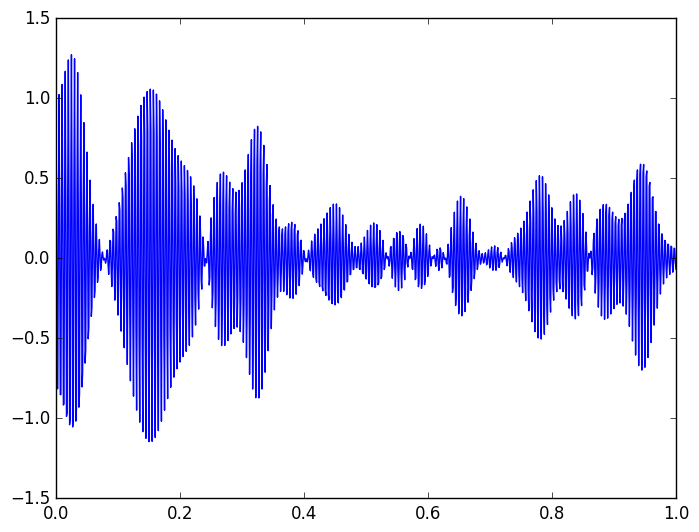

 in transpose(::QuantumOptics.operators_sparse.SparseOperator) at ./deprecated.jl:770
 in ctranspose at ./operators.jl:315 [inlined]
 in Ac_mul_B(::QuantumOptics.operators_sparse.SparseOperator, ::QuantumOptics.operators_sparse.SparseOperator) at ./operators.jl:319
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/nicolas/.julia/v0.5/IJulia/src/execute_request.jl:169
 in eventloop(::ZMQ.Socket) at /home/nicolas/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::IJulia.##9#15)() at ./task.jl:360
while loading In[22], in expression starting on line 2


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd45dab0d30>

In [22]:
tout, hola = timeevolution.schroedinger(T, psi0, H_coupling[1])
jajaja = expect(a'*a ⊗ identityoperator(b_spin), hola)
plot(g_vec, jajaja)

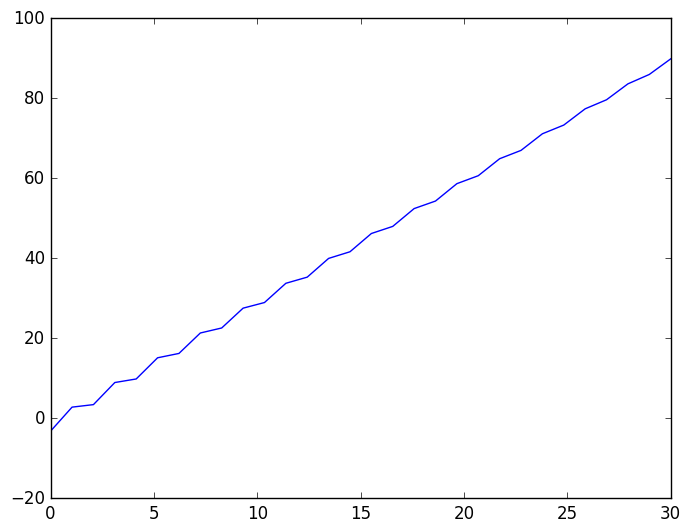

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd45da3dd68>

In [23]:
E = operatorspectrum(H)
plot(linspace(0,30,30), E)

In [24]:
expect(eigenstates(H)

LoadError: LoadError: syntax: incomplete: premature end of input
while loading In[24], in expression starting on line 1

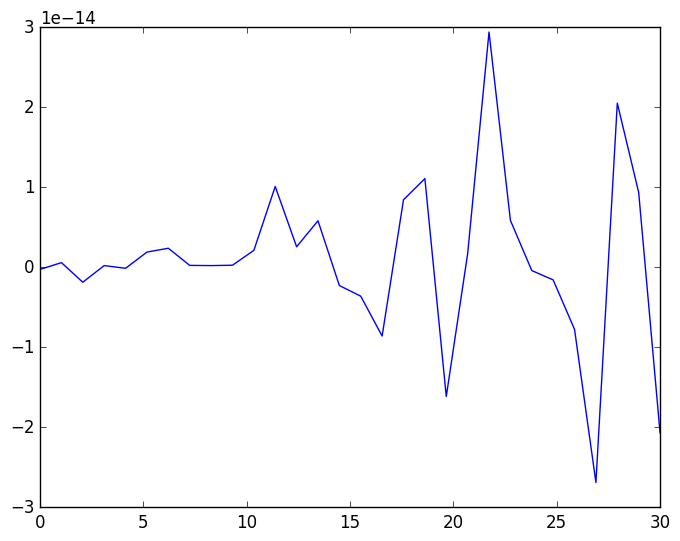

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd45d7af780>

In [25]:
#tout, hhh = timeevolution.schroedinger(T,eigenstates(H), H_coupling[1])
ja = expect(a'*a ⊗ identityoperator(b_spin), eigenstates(H))
plot(linspace(0,30,30), ja)

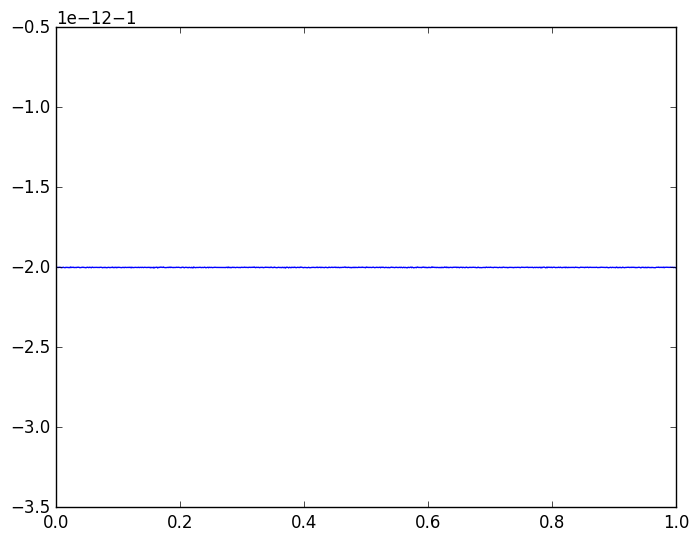

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd45d812be0>

In [26]:
kkk = []
for i in 1:length(g_vec)
    #push!(kkk,expect(a'*a ⊗ identityoperator(b_spin), groundstate(H_coupling[i])))
    push!(kkk,expect(identityoperator(b_fock) ⊗ sz, groundstate(H_coupling[i])))
end
return kkk
plot(g_vec, kkk)


In [27]:
Hatom = ω_A*sz/2  # Sección del Hamiltoniano relacionado con el átomo 
Hfield = ω_C*at*a #Probaremos si cambiando n = at*a cambia el asunto.     
Hint = g*(at⊗sm + a⊗sp)

Hint_2 = g*(at⊗sm + a⊗sp + at⊗sp + a⊗sm)

H = identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint

QuantumOptics.operators_sparse.SparseOperator(QuantumOptics.bases.CompositeBasis([16,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2)]),QuantumOptics.bases.CompositeBasis([16,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2)]),
	[1 ,  1]  =  3.14159+0.0im
	[4 ,  1]  =  0.314159+0.0im
	[2 ,  2]  =  -3.14159+0.0im
	[3 ,  3]  =  9.42478+0.0im
	[6 ,  3]  =  0.444288+0.0im
	[1 ,  4]  =  0.314159+0.0im
	[4 ,  4]  =  3.14159+0.0im
	[5 ,  5]  =  15.708+0.0im
	[8 ,  5]  =  0.54414+0.0im
	[3 ,  6]  =  0.444288+0.0im
	⋮
	[27, 27]  =  84.823+0.0im
	[30, 27]  =  1.17548+0.0im
	[25, 28]  =  1.13272+0.0im
	[28, 28]  =  78.5398+0.0im
	[29, 29]  =  91.1062+0.0im
	[32, 29]  =  1.21673+0.0im
	[27, 30]  =  1.17548+0.0im
	[30, 30]  =  84.823+0.0im
	[31, 31]  =  97.3894+0.0im
	[29, 32]  =  1.21673+0.0im
	[32, 32]  =  91.1062+0.0im)

In [28]:
base_spin = tensor(sigmam(SpinBasis(1//2)), sigmam(SpinBasis(1//2)))
completa = tensor(destroy(FockBasis(N)),base_spin)

psi_inicial =(coherentstate(b_fock, 1) ⊗ spinup(b_spin) ⊗ spindown(b_spin))

tout, evol = timeevolution.schroedinger(T, psi_inicial, completa)


([0.0,0.1001,0.2002,0.3003,0.4004,0.500501,0.600601,0.700701,0.800801,0.900901  …  99.0991,99.1992,99.2993,99.3994,99.4995,99.5996,99.6997,99.7998,99.8999,100.0],QuantumOptics.states.Ket[QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[0.0+0.0im,0.606531+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.606531+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.428882+0.0im  …  0.0+0.0im,0.0+0.0im,0.0+0.0im,2.05423e-6+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,5.30399e-7+0.0im,0.0+0.0im,0.0+0.0im]),QuantumOptics.states.Ket(QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[0.0+0.0im,0.606531+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.606531+0.0im,0.0+0.0im,0.0+0.0im,0.0+0.0im,0.428882+0.0im

In [29]:
completa

QuantumOptics.operators_sparse.SparseOperator(QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2)]),QuantumOptics.bases.CompositeBasis([16,2,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2)]),
	[4 ,  5]  =  1.0+0.0im
	[8 ,  9]  =  1.41421+0.0im
	[12, 13]  =  1.73205+0.0im
	[16, 17]  =  2.0+0.0im
	[20, 21]  =  2.23607+0.0im
	[24, 25]  =  2.44949+0.0im
	[28, 29]  =  2.64575+0.0im
	[32, 33]  =  2.82843+0.0im
	[36, 37]  =  3.0+0.0im
	[40, 41]  =  3.16228+0.0im
	[44, 45]  =  3.31662+0.0im
	[48, 49]  =  3.4641+0.0im
	[52, 53]  =  3.60555+0.0im
	[56, 57]  =  3.74166+0.0im
	[60, 61]  =  3.87298+0.0im)

In [30]:
?timeevolution.schroedinger

Integrate Schroedinger equation.

## Arguments

tspan     Vector specifying the points of time for which output should be displayed. psi0     Initial state vector (can be a bra or a ket). H     Operator specifying the Hamiltonian.

## Keyword Arguments

fout (optional)     If given this function fout(t, psi) is called every time an output should     be displayed. To limit copying to a minimum the given state psi     is further used and therefore must not be changed.


In [31]:
sigmam(SpinBasis(1//2))

QuantumOptics.operators_sparse.SparseOperator(QuantumOptics.spin.SpinBasis([2],1//2),QuantumOptics.spin.SpinBasis([2],1//2),
	[2, 1]  =  1.0+0.0im)

In [32]:
tensor()

LoadError: LoadError: Tensor function needs at least one argument.
while loading In[32], in expression starting on line 1

In [33]:

ψ_inicial_4 =(coherentstate(b_fock, 2) ⊗ (spinup(b_spin)))
tout, ψ_tiempo_4 = timeevolution.schroedinger(T, ψ_inicial_4, H)
prob = dagger((coherentstate(b_fock, 2) ⊗ (spinup(b_spin))))

QuantumOptics.states.Bra(QuantumOptics.bases.CompositeBasis([16,2],QuantumOptics.bases.Basis[QuantumOptics.fock.FockBasis([16],0,15),QuantumOptics.spin.SpinBasis([2],1//2)]),Complex{Float64}[0.135335-0.0im,0.0-0.0im,0.270671-0.0im,0.0-0.0im,0.382786-0.0im,0.0-0.0im,0.442003-0.0im,0.0-0.0im,0.442003-0.0im,0.0-0.0im  …  0.0438695-0.0im,0.0-0.0im,0.0253281-0.0im,0.0-0.0im,0.0140495-0.0im,0.0-0.0im,0.00750977-0.0im,0.0-0.0im,0.00387803-0.0im,0.0-0.0im])